In [175]:
# to read the csv file
import pandas as pd
import csv

# utils
import numpy as np

# to do graphs
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split

# sklearn models
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# sklearn scores
from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE

# keras
import tensorflow.keras as keras

## 1. Data exploration and preprocessing

The goal of the project is to predic the credit issue of a client (Y), according to some variables, as shown below.
A credit default contains the following variables:

<table>
<tr>
    <th>Variable</th>
    <th>Content</th>
    <th>Type</th>
</tr>
<tr class="odd">
    <td align="left">BirthDate</td>
    <td align="left">Client birth date</td>
    <td align="left">Date</td>
</tr>
<tr class="even">
    <td align="left">Customer_Open_Date</td>
    <td align="left">Arrival date of the client in the branch of the bank filial</td>
    <td align="left">Date</td>
</tr>
<tr class="odd">
<td align="left">Customer_Type</td>
<td align="left">Customer type (existing / new)</td>
<td align="left">String</td>
</tr>
<tr class="even">
<td align="left">Educational_Level</td>
<td align="left">Highest Degree</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Id_Customer</td>
<td align="left">Customer identifier</td>
<td align="left">Numerical</td>
</tr>
<tr class="even">
<td align="left">Marital_Status</td>
<td align="left">Martital status</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Nb_Of_Products</td>
<td align="left">Number of products detained by the customer at the decision date</td>
<td align="left">Numerical</td>
</tr>
<tr class="even">
<td align="left">Net_Annual_Income</td>
<td align="left">Annual income</td>
<td align="left">Numerical</td>
</tr>
<tr class="odd">
<td align="left">Number_Of_Dependant</td>
<td align="left">Number of dependant</td>
<td align="left">Numerical</td>
</tr>
<tr class="even">
<td align="left">P_Client</td>
<td align="left">Intern categorization of the client</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Prod_Category</td>
<td align="left">Product category</td>
<td align="left">String</td>
</tr>
<tr class="even">
<td align="left">Prod_Closed_Date</td>
<td align="left">Closing date of the product</td>
<td align="left">Date</td>
</tr>
<tr class="odd">
<td align="left">Prod_Decision_Date</td>
<td align="left">Decision date of the financing grant</td>
<td align="left">Date</td>
</tr>
<tr class="even">
<td align="left">Prod_Sub_Category</td>
<td align="left">Product subcategory</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Source</td>
<td align="left">Financing source (Branch / Sales)</td>
<td align="left">String</td>
</tr>
<tr class="even">
<td align="left">Type_Of_Residence</td>
<td align="left">Type of residence</td>
<td align="left">String</td>
</tr>
<tr class="odd">
<td align="left">Years_At_Business</td>
<td align="left">Number of years in the current job</td>
<td align="left">Numerical</td>
</tr>
<tr class="even">
<td align="left">Years_At_Residence</td>
<td align="left">Number of years at the current residence place</td>
<td align="left">Numerical</td>
</tr>
<tr class="odd">
<td align="left">Y</td>
<td align="left">Credit issue (to be predicted)</td>
<td align="left">Numerical</td>
</tr>
</table>

In [2]:
df = pd.read_csv("CreditTraining.csv")
keys = df.keys()
df.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


The variables can already be categorised:
- dates
- string categories (binary or not)
- integers categories (binary or not)
- numbers, "Net_Annual_Income" for instance

### a. The Customer Id
The id play does not provide any information, since there is no duplicate in the list of ids (meaning that the same customer does not appear twice in the list).

In [3]:
len(df[keys[0]]) == len(list(dict.fromkeys(df[keys[0]])))

True

In [4]:
df = df.drop(columns=['Id_Customer'])
keys = df.keys()

### b. Dates
The string data needs to be put under a good format.

In [5]:
date_variables = ['BirthDate', 'Customer_Open_Date', 'Prod_Decision_Date', 'Prod_Closed_Date']
for var in date_variables:
    df[var] = pd.to_datetime(df[var])
df.head()

,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,0,Non Existing Client,1977-07-08,2012-02-13,NP_Client,University,Married,3.0,1,36,1.0,C,2012-02-14,Sales,Owned,1,NaT,B
1,0,Existing Client,1974-06-13,2009-04-02,P_Client,University,Married,0.0,12,18,2.0,C,2011-06-30,Sales,Parents,1,NaT,G
2,0,Non Existing Client,1973-07-11,2012-03-04,NP_Client,University,Married,2.0,10,36,1.0,C,2012-04-04,Sales,Owned,1,NaT,B
3,1,Existing Client,1982-08-07,2011-08-25,NP_Client,University,Married,3.0,3,36,1.0,C,2011-07-09,Sales,New rent,1,2012-12-31,L
4,0,Non Existing Client,1953-08-18,2012-10-01,NP_Client,University,Married,2.0,1,36,1.0,C,2012-11-01,Sales,Owned,1,NaT,D


### c. Categorical variables

In [6]:
categorical_variables = [ 'Y', 'Customer_Type', 'P_Client', 'Educational_Level', 
                         'Marital_Status', 'Prod_Sub_Category', 'Source', 'Type_Of_Residence', 'Prod_Category']
for var in categorical_variables:
    df[var]= df[var].astype('category')

### d. Numeric variables

In [7]:
df['Net_Annual_Income'] = df['Net_Annual_Income'].astype('str').apply(lambda x: str(x.replace(',','.')))
df['Net_Annual_Income'] = df['Net_Annual_Income'].astype('float')

In [8]:
numerical_variables = ['Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income',
                     'Years_At_Business', 'Nb_Of_Products' ]

### e. Brief overview of the variables

First, let see the type and a summary of each column

In [9]:
print("{0:30} {1:30} {2}".format("Column", "Type", "Number of members"))
print("------------------------------------------------------------------------------------")
for column in keys:
    print("{0:30} {1:30} {2}".format(column, str(df[column].dtypes) , str(len(list(dict.fromkeys(df[column].values))))))

Column                         Type                           Number of members
------------------------------------------------------------------------------------
Y                              category                       2
Customer_Type                  category                       2
BirthDate                      datetime64[ns]                 4382
Customer_Open_Date             datetime64[ns]                 1244
P_Client                       category                       2
Educational_Level              category                       4
Marital_Status                 category                       5
Number_Of_Dependant            float64                        12
Years_At_Residence             int64                          60
Net_Annual_Income              float64                        524
Years_At_Business              float64                        46
Prod_Sub_Category              category                       3
Prod_Decision_Date             datetime64[ns]           

In [10]:
df.describe(include = 'category')

,Y,Customer_Type,P_Client,Educational_Level,Marital_Status,Prod_Sub_Category,Source,Type_Of_Residence,Prod_Category
count,5380,5380,5380,5380,5380,5380,5380,5380,5380
unique,2,2,2,4,5,3,2,5,13
top,0,Non Existing Client,NP_Client,University,Married,C,Sales,Owned,B
freq,4987,3369,4968,4785,4206,4638,4119,4791,3176


In [11]:
df.describe(include = 'datetime64[ns]')

,BirthDate,Customer_Open_Date,Prod_Decision_Date,Prod_Closed_Date
count,5380,5380,5380,1174
unique,4382,1244,276,331
top,1982-01-01 00:00:00,2011-05-12 00:00:00,2011-06-12 00:00:00,2013-05-30 00:00:00
freq,7,39,48,98
first,1937-06-12 00:00:00,1982-04-03 00:00:00,2011-01-06 00:00:00,2011-10-31 00:00:00
last,1990-11-01 00:00:00,2012-12-04 00:00:00,2012-12-04 00:00:00,2013-12-05 00:00:00


In [12]:
df.describe()

,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Nb_Of_Products
count,5378.000000,5380.000000,5378.000000,5378.000000,5380.000000
mean,1.058572,12.626022,61.181694,4.266270,1.089033
std,1.339001,9.972164,237.744827,7.225926,0.297587
min,0.000000,0.000000,0.004000,0.000000,1.000000
25%,0.000000,4.000000,20.000000,1.000000,1.000000
50%,0.000000,10.000000,36.000000,1.000000,1.000000
75%,2.000000,18.000000,36.000000,4.000000,1.000000
max,20.000000,70.000000,10000.000000,98.000000,3.000000


Now, visualize the variables one by one:

0    4987
1     393
Name: Y, dtype: int64
-------
Non Existing Client    3369
Existing Client        2011
Name: Customer_Type, dtype: int64
-------
NP_Client    4968
P_Client      412
Name: P_Client, dtype: int64
-------
University           4785
Master/PhD            522
Diploma                58
Secondary or Less      15
Name: Educational_Level, dtype: int64
-------
Married      4206
Single       1046
Widowed        64
Divorced       63
Separated       1
Name: Marital_Status, dtype: int64
-------
C    4638
G     624
P     118
Name: Prod_Sub_Category, dtype: int64
-------
Sales     4119
Branch    1261
Name: Source, dtype: int64
-------
Owned       4791
Old rent     323
Parents      179
New rent      83
Company        4
Name: Type_Of_Residence, dtype: int64
-------
B    3176
D     670
C     517
K     265
L     236
G     188
E     101
H      79
J      71
M      49
A      19
F       5
I       4
Name: Prod_Category, dtype: int64
-------


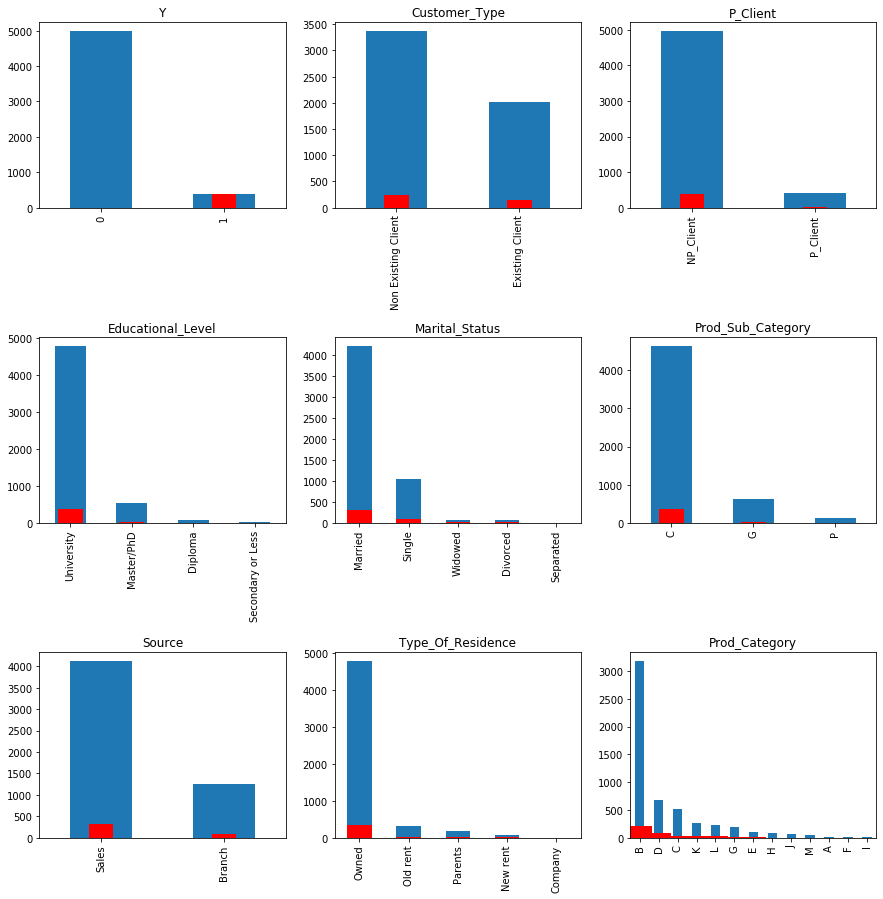

In [13]:
plt.figure(figsize=(15,15))

for i,var in enumerate(categorical_variables):
    plt.subplot(3,3,i+1)
    print(df[var].value_counts())
    print('-------')
    df[var].value_counts().plot("bar").set_title(var)
    hist_data = df.loc[df['Y'] == 1][var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width = len(hist_data)/10, color='red')

plt.subplots_adjust(hspace = 0.7)
plt.show()

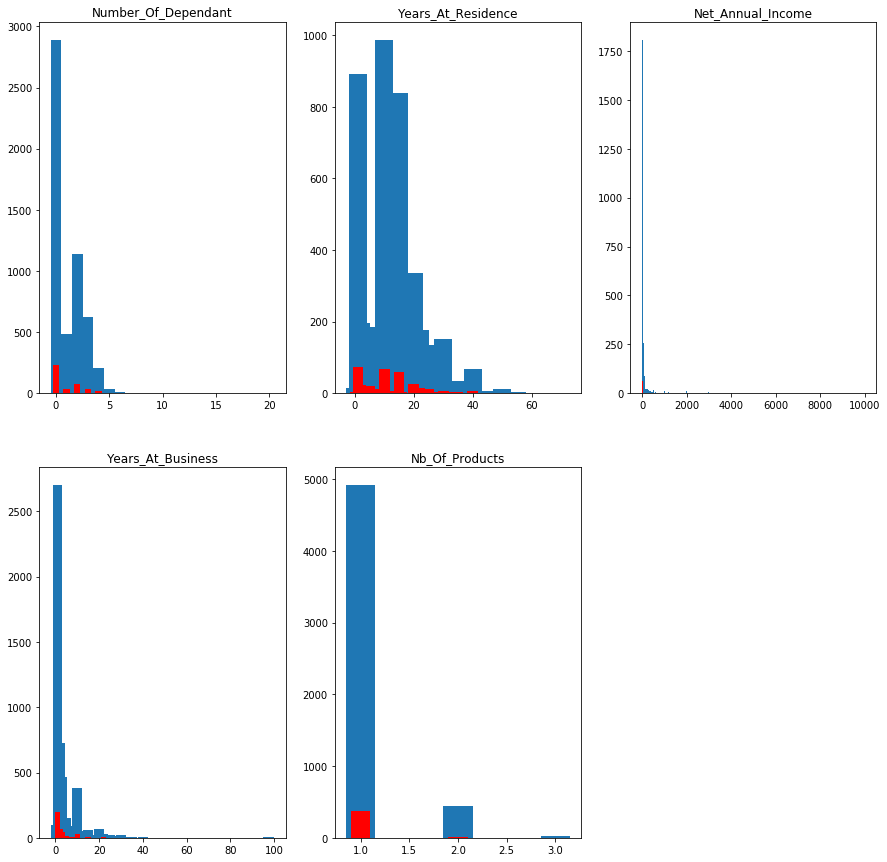

In [14]:
plt.subplots(figsize=(15,15))

for i, var in enumerate(numerical_variables):
    fig = plt.subplot(2,3,i+1)
    fig.set_title(var)
    hist_data = df[var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width = len(hist_data)/10)
    hist_data = df.loc[df['Y'] == 1][var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width = len(hist_data)/10, color='red')
    
plt.show()

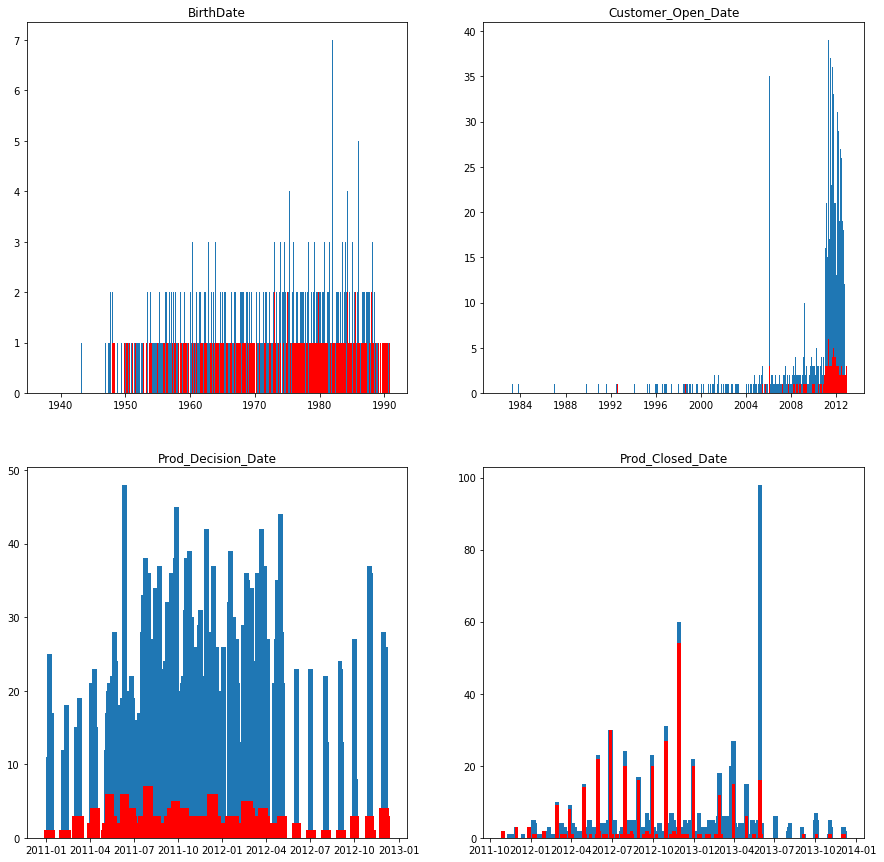

In [15]:
plt.subplots(figsize=(15,15))

for i, var in enumerate(date_variables):
    fig = plt.subplot(2,2,i+1)
    fig.set_title(var)
    hist_data = df[var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width =10)
    hist_data = df.loc[df['Y'] == 1][var].value_counts()
    plt.bar(height=hist_data.values, x = hist_data.keys(), width = len(hist_data)/10, color='red')
    
plt.show()

The field Prod_Closed_Date is really often not attributed, look for further insights:

In [16]:
count_nat_0 = 0
count_nat_1 = 0
count_0 = 0
count_1 = 1
for i in range(len(df)):
    if pd.isnull(df['Prod_Closed_Date'][i]):
        if df['Y'][i]==0:
            count_nat_0 += 1
        else:
            count_nat_1 +=1
    else:
        if df['Y'][i]==0:
            count_0 += 1
        else:
            count_1 +=1
        
print(str(count_nat_0+count_nat_1) + ' NaT')
print(str(round(100 * count_nat_1/(count_nat_0 + count_nat_1),2 ) ) + '% of 1 in the NaT fields')
print(str(round(100 * count_1/(count_0 + count_1),2 ) ) + '% of 1 in the not NaT fields')

4206 NaT
0.78% of 1 in the NaT fields
30.72% of 1 in the not NaT fields


One can observe that:
- the count of each variable does not always match the 5380 rows that are intended (because of the NaN). These values have been replaced by the median values
- The Prod_Closed_Date field should be filled with a value that is far enough from the others to account for a clear separation
- There are some extrapolated values in some numeric features (the net annual income of 10000, or the years at business of 98), that might be good to remove

### f. Complete and create suitable dataset for training and testing

First fill the NA fields

In [17]:
for var in ['Number_Of_Dependant', 'Net_Annual_Income', 'Years_At_Business']:
    df[var] = df[var].fillna(df[var].mean())

In [18]:
df['Prod_Closed_Date'] = df['Prod_Closed_Date'].fillna(np.datetime64('2015-01-01'))

Reject unrelevant data

In [19]:
df = df.loc[df['Number_Of_Dependant'] < 15].loc[df['Net_Annual_Income'] < 6000 ].loc[df['Years_At_Business']< 80]

Use catagorical features as a one hot vector

In [20]:
categorical_variables.remove('Y')
categorical_df = pd.get_dummies(df[categorical_variables])
categorical_df.head()

,Customer_Type_Existing Client,Customer_Type_Non Existing Client,P_Client_NP_Client,P_Client_P_Client,Educational_Level_Diploma,Educational_Level_Master/PhD,Educational_Level_Secondary or Less,Educational_Level_University,Marital_Status_Divorced,Marital_Status_Married,...,Prod_Category_D,Prod_Category_E,Prod_Category_F,Prod_Category_G,Prod_Category_H,Prod_Category_I,Prod_Category_J,Prod_Category_K,Prod_Category_L,Prod_Category_M
0,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


Dates need to be put into a numerical format. To do so, first remark that there is no periodicity (due to the months for instance). Only the information that comes from month and year will be kept

In [21]:
# takes a timestamp: DD/MM/YY and converts it to a scalar
def read_date(date):
    return date.month/12.0 + date.year

In [22]:
date_df = pd.DataFrame()
for var in date_variables:
    date_df[var] = df[var].apply(read_date)
    
date_df = date_df - date_df.mean()
date_df.head()

,BirthDate,Customer_Open_Date,Prod_Decision_Date,Prod_Closed_Date
0,5.299547,1.508975,0.244100,0.469210
1,2.216213,-1.324359,-0.422567,0.469210
2,1.299547,1.592308,0.410766,0.469210
3,10.382880,1.008975,-0.339234,-1.614123
4,-18.617120,2.175641,0.994100,0.469210


Then numerical data are taken as they are

In [23]:
numerical_df = df[numerical_variables]
numerical_df.head()

,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Nb_Of_Products
0,3.0,1,36.0,1.0,1
1,0.0,12,18.0,2.0,1
2,2.0,10,36.0,1.0,1
3,3.0,3,36.0,1.0,1
4,2.0,1,36.0,1.0,1


Create the final dataframe

In [68]:
new_df = pd.concat([df['Y'], categorical_df, numerical_df, date_df], axis=1)
new_df.head()
y = new_df.pop('Y').values.codes
X = new_df.values
print(y)
print(X)

[0 0 0 ... 0 0 0]
[[ 0.          1.          1.         ...  1.5089746   0.24409975
   0.46920999]
 [ 1.          0.          0.         ... -1.32435874 -0.42256692
   0.46920999]
 [ 0.          1.          1.         ...  1.59230793  0.41076641
   0.46920999]
 ...
 [ 0.          1.          1.         ...  1.0089746  -0.25590025
  -1.36412335]
 [ 0.          1.          1.         ...  1.42564126  0.16076641
   0.46920999]
 [ 0.          1.          1.         ...  1.17564126 -0.08923359
   0.46920999]]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The training dataset has a vast majority of y=0 cases, because the dataset is not balanced. We can resample the training dataset. To do it, we use the fit_resample method of the imblearn library. Then a more complex method referred to as the Synthetic Minority Oversampling Technique was used: new examples can be synthesized from the existing examples and are used instead of duplicated samples of the mninority class. 

In [70]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [71]:
X_rspl_train, y_rspl_train = X_resampled, y_resampled
# X_rspl_train, X_rspl_test, y_rspl_train, y_rspl_test = train_test_split(X_resampled, y_resampled, test_size=0.0, random_state=42)

In [72]:
smote = SMOTE(random_state = 40)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote_train, y_smote_train = X_smote, y_smote
#X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42) 

## 2. Feature engineering

### a. Utils

In [73]:
def predict_classes(y, threshold =0.5):
    return [0 if yi < threshold else 1 for yi in y]

def print_confusion(confusion_matrix):
    print('Confusion matrix:')
    print("{0:20} {1:10} {2}".format("GT \ Pred", "0", "1"))
    print("{0:20} {1:10} {2}".format("0", str(confusion_matrix[0,0]), str(confusion_matrix[0,1])))
    print("{0:20} {1:10} {2}".format("1", str(confusion_matrix[1,0]) , str(confusion_matrix[1,1])))

def score(y_proba_pred):
    fpr, tpr, thresholds = roc_curve(y_test,y_proba_pred)
    precision, recall, thresholds_bis = precision_recall_curve(y_test,y_proba_pred)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.title('Precision Recall Curve')
    plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

    f1_max = 0
    y_pred_max = []
    th_max=0
    for threshold in np.linspace(start=0.0, stop=1.0, num=1001):
        y_pred = predict_classes(y_proba_pred, threshold)
        f1 = f1_score(y_test,y_pred)
        if f1 > f1_max:
            th_max=threshold
            f1_max = f1
            y_pred_max = y_pred
    
    print('F1_Score: ' + str(round(f1_max,3)) + ' --- for a threshold of: '+ str(round(th_max,3)))
    print_confusion(confusion_matrix(y_test, y_pred_max))

### b. Scores

We need to be carefull when choosing the metrics we will use to evaluate our models. The dataset is highly unbalanced, thus acurracy is not a good score and can be misleading.

In [74]:
y = [0 for k in range(len(y_test))]
acc = accuracy_score(y, y_test)
print(acc)

0.9236499068901304


To have a more accurate way to compare our models, we will use other scoring methods, that allows us to compare the predictions on different classes. Moreover, the user might want to have control over the Sensitivity or the Specifity of the predictions. Therefore, probability output might give more insights than just a classification.

Therefore, we will use ROC and Precision-Recall Curve, as well as the F1 score and the confusion matrix, that allows us to control accuracy on both classes.

#### ROC Curve
A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.
It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 

The true positive rate or sensitivity describes how good the model is at predicting the positive class when the actual outcome is positive. 
TPR = True Positives / (True Positives + False Negatives)

The false positive rate, also referred to as the inverted specificity, summarizes how often a positive class is predicted when the actual outcome is negative.
FPR = False Positives / (False Positives + True Negatives)

#### Precision-Recall Curve
Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).
The reason for this is that typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high true negatives.

Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.
Precision = True Positives / (True Positives + False Positives)

Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

#### Scores
- F1 score: that calculates the harmonic mean of the precision and recall: F1 = 2 * (precision * recall) / (precision + recall)
- Area Under Curve: summarizes the integral or an approximation of the area under the precision-recall curve.


### c. Linear models

#### i. Linear Regressions

##### Simple linear regression

In [159]:
reg1 = linear_model.LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

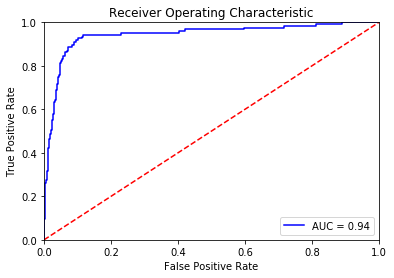

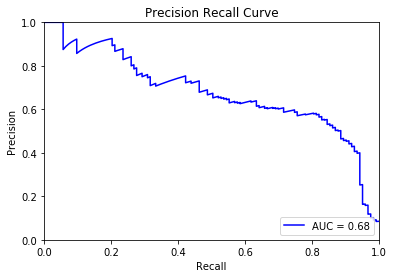

F1_Score: 0.678 --- for a threshold of: 0.346
Confusion matrix:
GT \ Pred            0          1
0                    1416       72
1                    23         100


In [160]:
y_proba_pred = reg1.predict(X_test)
score(y_proba_pred)

Good ROC AUC, but PR-AUC and F1-score could be better and the precision-recall curve shows a weird trend. In fact the prediction is not as good on 1 (19% are not well-predicted), while the prediction is better on the class 0. We will try to better the results by using the balanced dataset:

##### Linear regression with resampled dataset

In [77]:
reg = linear_model.LinearRegression()
reg.fit(X_rspl_train, y_rspl_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

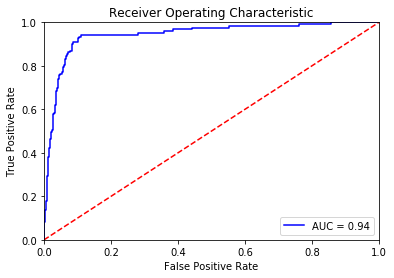

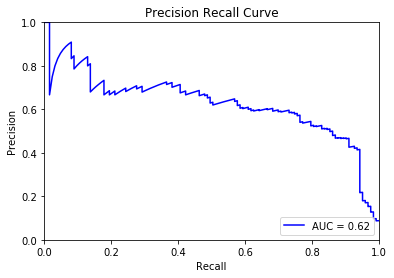

F1_Score: 0.657 --- for a threshold of: 0.76
Confusion matrix:
GT \ Pred            0          1
0                    1421       67
1                    30         93


In [78]:
y_proba_pred = reg.predict(X_test)
score(y_proba_pred)

Paradoxically, the prediction with the balanced dataset is not as good as before and an improvement can only be seen in the majority class... We will try with the other balanced dataset created with the SMOTE algorithm

In [79]:
reg = linear_model.LinearRegression()
reg.fit(X_smote_train, y_smote_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

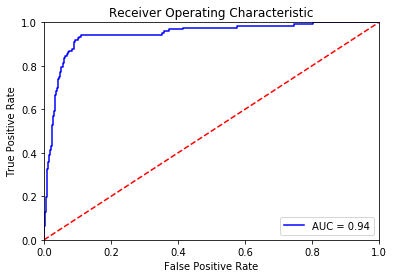

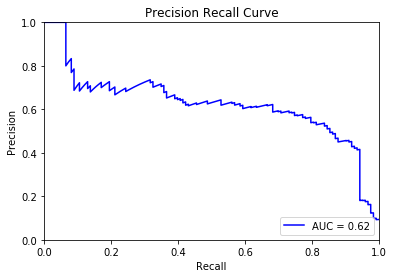

F1_Score: 0.66 --- for a threshold of: 0.75
Confusion matrix:
GT \ Pred            0          1
0                    1412       76
1                    25         98


In [80]:
y_proba_pred = reg.predict(X_test)
score(y_proba_pred)

As a first insight, we can see that the balanced dataset brings no improvement to the linear model, and that there is not great difference between the two ways in which the balanced datasets were created.

##### Linear regression with Ridge penalization

Ridge regression imposes a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

$$ \min_{w} || X w - y||_2^2 + \alpha ||w||_2^2 $$

Here, we will use cross validation to determine the best parameters. RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Generalized Cross-Validation (GCV), an efficient form of leave-one-out cross-validation.

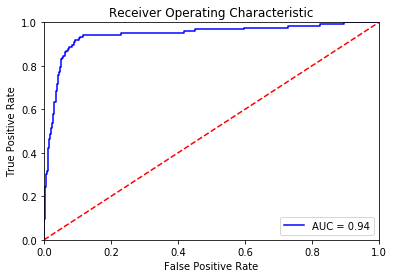

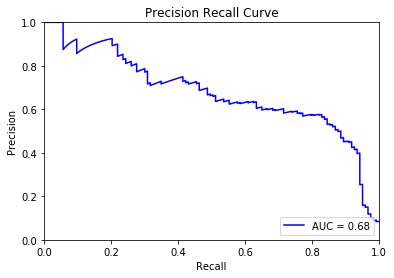

F1_Score: 0.678 --- for a threshold of: 0.34
Confusion matrix:
GT \ Pred            0          1
0                    1414       74
1                    22         101


In [82]:
ridge_reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_reg.fit(X_train, y_train)

y_proba_pred = ridge_reg.predict(X_test)
score(y_proba_pred)

##### Linear Regression with Lasso penalization

Lasso regression consists of a linear model with an added regularization term. The lasso estimate solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1$-norm of the coefficient vector. The objective function to minimize is:
 $$ \min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1} $$
 
 Here again, we will use cross validation to determine the best parameters.

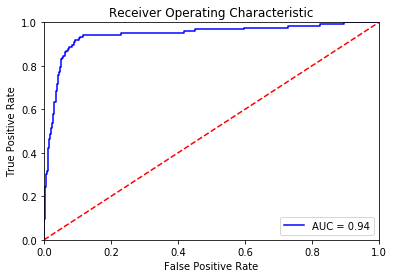

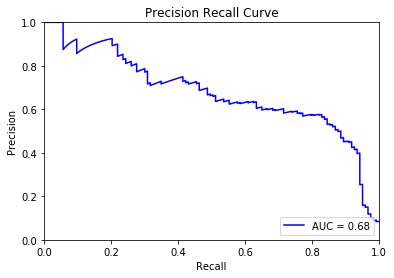

F1_Score: 0.678 --- for a threshold of: 0.34
Confusion matrix:
GT \ Pred            0          1
0                    1414       74
1                    22         101


In [84]:
lasso_reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
lasso_reg.fit(X_train, y_train)

y_proba_pred = ridge_reg.predict(X_test)
score(y_proba_pred)

Regularizations bring little improvement on the test set. 

#### ii. Logistic Regressions

Now let us use a regression which is more fitted to classification: the logistic regression

##### Simple logistic regression

In [163]:
logreg1 = linear_model.LogisticRegression(class_weight = 'balanced') # The “balanced” mode uses the values of y to automatically adjust weights
logreg1.fit(X_train, y_train)

C:\Users\pierr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

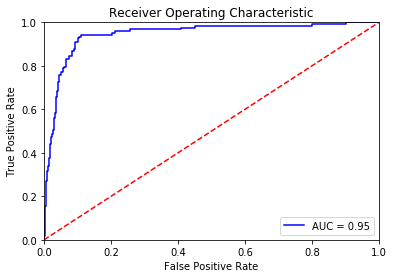

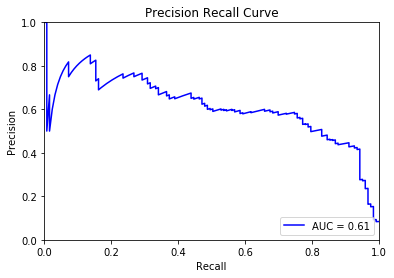

F1_Score: 0.657 --- for a threshold of: 0.818
Confusion matrix:
GT \ Pred            0          1
0                    1423       65
1                    31         92


In [164]:
y_proba_pred = logreg1.predict_proba(X_test)[:,1] # We need to use the predict proba function and not the predict one for ROC and Precision-Recall Curves
score(y_proba_pred)

##### Logistic regression using over-sampled train set

In [94]:
logreg = linear_model.LogisticRegression() #The “balanced” mode uses the values of y to automatically adjust weights
logreg.fit(X_rspl_train, y_rspl_train)

C:\Users\pierr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

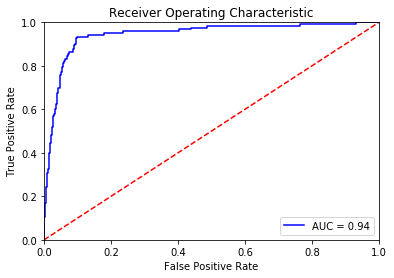

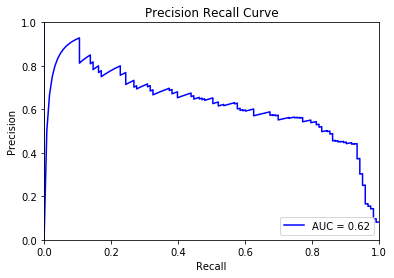

F1_Score: 0.651 --- for a threshold of: 0.817
Confusion matrix:
GT \ Pred            0          1
0                    1408       80
1                    25         98


In [95]:
y_proba_pred = logreg.predict_proba(X_test)[:,1]
score(y_proba_pred)

In [96]:
#using train set obtained with SMOTE over-sampling
logreg = linear_model.LogisticRegression() #The “balanced” mode uses the values of y to automatically adjust weights
logreg.fit(X_smote_train, y_smote_train)

C:\Users\pierr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

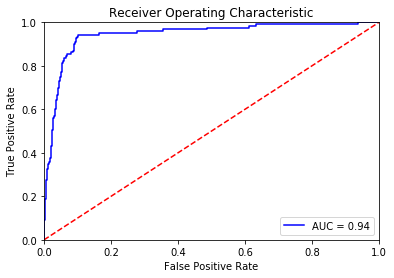

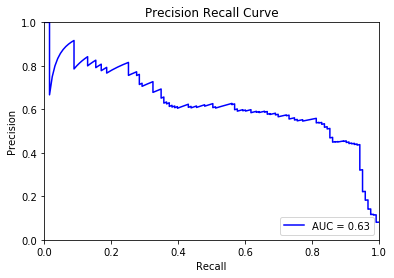

F1_Score: 0.662 --- for a threshold of: 0.83
Confusion matrix:
GT \ Pred            0          1
0                    1409       79
1                    23         100


In [98]:
y_proba_pred = logreg.predict_proba(X_test)[:,1]
score(y_proba_pred)

Using the over-sampling method sligthly decrease the F1 score of the prediction results (maybe because they are already taken into account by the class_weight argument), we will not use them for later.
Now, let's try different penalization. The logistic regression implemented in scikit-learn offers l1 and l2 penalty. We will try both regularization and we will perform cross validation with a range of different parameters. 

##### Logictic regression with l1 penalty (Lasso regularization)

 L1 penalized logistic regression minimizes the following cost function: 

$$ \min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $$

100


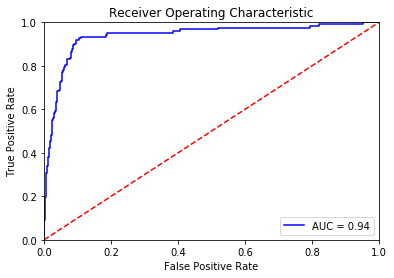

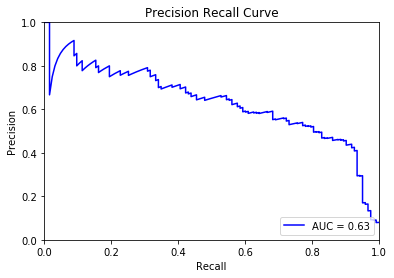

F1_Score: 0.635 --- for a threshold of: 0.82
Confusion matrix:
GT \ Pred            0          1
0                    1407       81
1                    28         95


In [99]:
logistic = linear_model.LogisticRegression(class_weight = 'balanced', penalty ='l1', solver = 'liblinear')
parameters = {'C': [1e-10, 1e-7, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 100, 1000]} #parameter C is th inverse of regularization strength
logistic_regressor = GridSearchCV(logistic, parameters, scoring='f1_weighted')
logistic_regressor.fit(X_train, y_train)
C = logistic_regressor.best_params_['C']
print(C)

log_reg = linear_model.LogisticRegression(class_weight = 'balanced', penalty ='l1', C=C, solver = 'liblinear')
log_reg.fit(X_train, y_train)

y_proba_pred = log_reg.predict_proba(X_test)[:,1]
score(y_proba_pred)

##### Logictic regression with l2 penalty (Ridge regularisation)

L2 penalized logistic regression minimizes the following cost function:

$$ \min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $$

50


C:\Users\pierr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


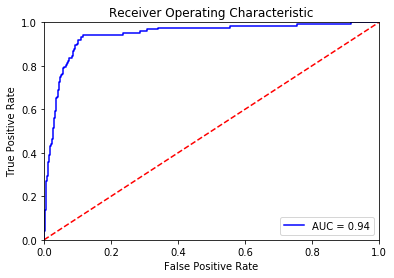

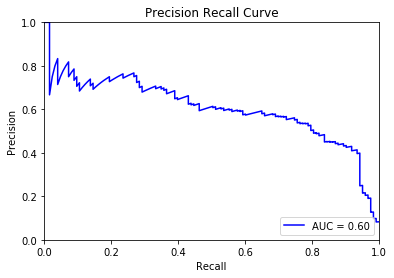

F1_Score: 0.639 --- for a threshold of: 0.829
Confusion matrix:
GT \ Pred            0          1
0                    1413       75
1                    30         93


In [100]:
logistic = linear_model.LogisticRegression(class_weight = 'balanced', penalty ='l2', solver = 'lbfgs', max_iter = 10000)
parameters = {'C': [1e-10, 1e-7, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 50]} 
logistic_regressor = GridSearchCV(logistic, parameters, scoring='f1_weighted', cv=5)
logistic_regressor.fit(X_train, y_train)
C = logistic_regressor.best_params_['C']
print(C)

log_reg = linear_model.LogisticRegression(class_weight = 'balanced', penalty ='l2', C=C, solver = 'lbfgs')
log_reg.fit(X_train, y_train)

y_proba_pred = log_reg.predict_proba(X_test)[:,1]
score(y_proba_pred)

##### Logictic regression with elasticnet penalty 


Elastic-Net regularization is a combination of l1 and l2 penalization, and minimizes the following cost function:

$$  \min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $$

In [47]:
### Needs time to compute ...
'''
logistic = linear_model.LogisticRegression(class_weight = 'balanced', penalty ='elasticnet', solver = 'saga', max_iter = 2000)
parameters = {'C': [1e-4, 1e-2, 1e-1, 1, 10, 50], 'l1_ratio': [0.2, 0.4, 0.6, 0.8]}
logistic_regressor = GridSearchCV(logistic, parameters, scoring='balanced_accuracy')
logistic_regressor.fit(X_train, y_train)
C = logistic_regressor.best_params_['C']
print(C)
l1_ratio = logistic_regressor.best_params_['l1_ratio']

log_reg = linear_model.LogisticRegression(class_weight = 'balanced', penalty ='elasticnet', C=C, l1_ratio=l1_ratio, solver = 'saga')
log_reg.fit(X_train, y_train)

y_proba_pred = log_reg.predict_proba(X_test)[:,1]
score(y_proba_pred)
'''

"\nlogistic = linear_model.LogisticRegression(class_weight = 'balanced', penalty ='elasticnet', solver = 'saga', max_iter = 2000)\nparameters = {'C': [1e-4, 1e-2, 1e-1, 1, 10, 50], 'l1_ratio': [0.2, 0.4, 0.6, 0.8]}\nlogistic_regressor = GridSearchCV(logistic, parameters, scoring='balanced_accuracy')\nlogistic_regressor.fit(X_train, y_train)\nC = logistic_regressor.best_params_['C']\nprint(C)\nl1_ratio = logistic_regressor.best_params_['l1_ratio']\n\nlog_reg = linear_model.LogisticRegression(class_weight = 'balanced', penalty ='elasticnet', C=C, l1_ratio=l1_ratio, solver = 'saga')\nlog_reg.fit(X_train, y_train)\n\ny_proba_pred = log_reg.predict_proba(X_test)[:,1]\nscore(y_proba_pred)\n"

#### Sum-Up
As a summary, one can see that linear models already gives good results regarding to the ROC AUC (around 0.93 and 0.94 for the best model). Using a balanced dataset does not seem to improve the results, and the regularizations have little impact. At the end of the day, the best model is the simple linear regression with a F1 of 0.678, a ROC-AUC of 0.94 and a PR-AUC of 0.68.

Now let's try other classification methods.

### d. Neural Networks

To prevent from overfitting, we use an early stopping method on the accuracy of the validation dataset. Finally, we are using the logarithmic loss function (binary_crossentropy) during training, the preferred loss function for binary classification problems. The model also uses the efficient Adam optimization algorithm for gradient descent and accuracy metrics will be collected when the model is trained

In [165]:
layers = [
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid") # to get a 0-1 probability as a prediction
]

nn_model = keras.Sequential(layers)

nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience = 10)

nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 50, callbacks=[es_callback], verbose=2)

Train on 3756 samples, validate on 1611 samples
Epoch 1/50
 - 2s - loss: 0.4832 - acc: 0.8797 - val_loss: 0.2110 - val_acc: 0.9230
Epoch 2/50
 - 1s - loss: 0.2062 - acc: 0.9289 - val_loss: 0.1861 - val_acc: 0.9361
Epoch 3/50
 - 1s - loss: 0.1718 - acc: 0.9310 - val_loss: 0.2515 - val_acc: 0.9243
Epoch 4/50
 - 1s - loss: 0.1876 - acc: 0.9326 - val_loss: 0.1476 - val_acc: 0.9410
Epoch 5/50
 - 1s - loss: 0.1545 - acc: 0.9388 - val_loss: 0.1438 - val_acc: 0.9385
Epoch 6/50
 - 1s - loss: 0.1586 - acc: 0.9409 - val_loss: 0.3499 - val_acc: 0.9243
Epoch 7/50
 - 1s - loss: 0.1902 - acc: 0.9340 - val_loss: 0.1448 - val_acc: 0.9423
Epoch 8/50
 - 1s - loss: 0.1476 - acc: 0.9441 - val_loss: 0.1383 - val_acc: 0.9423
Epoch 9/50
 - 1s - loss: 0.1561 - acc: 0.9433 - val_loss: 0.1412 - val_acc: 0.9448
Epoch 10/50
 - 1s - loss: 0.1485 - acc: 0.9430 - val_loss: 0.1340 - val_acc: 0.9485
Epoch 11/50
 - 1s - loss: 0.1583 - acc: 0.9414 - val_loss: 0.1632 - val_acc: 0.9342
Epoch 12/50
 - 0s - loss: 0.1543 - ac

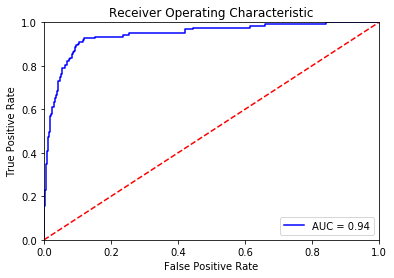

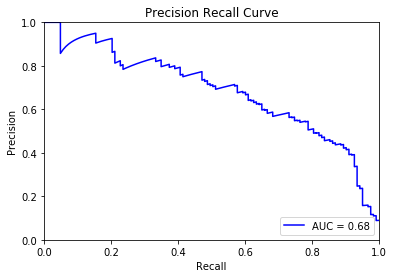

F1_Score: 0.65 --- for a threshold of: 0.35
Confusion matrix:
GT \ Pred            0          1
0                    1424       64
1                    33         90


In [166]:
y_proba_pred = nn_model.predict(X_test)
score(y_proba_pred)

The neural network gives results with score in the same order as the linear regression, with a good F1 score of 0.66 and good AUC's for both ROC curve and Precision-Recall curves in comparison to scores obtained with some linear regression. Now we can try with a resampling method.

In [145]:
nn_model2 = keras.Sequential(layers)

nn_model2.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

nn_model2.fit(X_rspl_train, y_rspl_train, validation_data=(X_test, y_test), epochs= 50, callbacks=[es_callback], verbose=2)

Train on 6972 samples, validate on 1611 samples
Epoch 1/50
 - 1s - loss: 0.0589 - acc: 0.9831 - val_loss: 0.3833 - val_acc: 0.9174
Epoch 2/50
 - 1s - loss: 0.0913 - acc: 0.9750 - val_loss: 0.4195 - val_acc: 0.9224
Epoch 3/50
 - 1s - loss: 0.0595 - acc: 0.9841 - val_loss: 0.3735 - val_acc: 0.9205
Epoch 4/50
 - 1s - loss: 0.0605 - acc: 0.9821 - val_loss: 0.4233 - val_acc: 0.9063
Epoch 5/50
 - 1s - loss: 0.0852 - acc: 0.9786 - val_loss: 0.3845 - val_acc: 0.9187
Epoch 6/50
 - 1s - loss: 0.0642 - acc: 0.9831 - val_loss: 0.3900 - val_acc: 0.9162
Epoch 7/50
 - 1s - loss: 0.0552 - acc: 0.9849 - val_loss: 0.4309 - val_acc: 0.9050
Epoch 8/50
 - 1s - loss: 0.0650 - acc: 0.9816 - val_loss: 0.4497 - val_acc: 0.8970
Epoch 9/50
 - 1s - loss: 0.0574 - acc: 0.9832 - val_loss: 0.3997 - val_acc: 0.9106
Epoch 10/50
 - 1s - loss: 0.0518 - acc: 0.9855 - val_loss: 0.3786 - val_acc: 0.9218
Epoch 11/50
 - 1s - loss: 0.0523 - acc: 0.9862 - val_loss: 0.3910 - val_acc: 0.9112
Epoch 12/50
 - 1s - loss: 0.0516 - ac

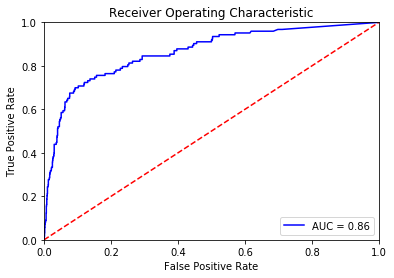

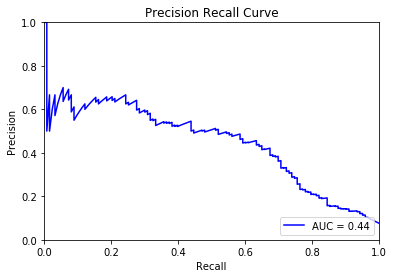

F1_Score: 0.531 --- for a threshold of: 0.714
Confusion matrix:
GT \ Pred            0          1
0                    1412       76
1                    51         72


In [146]:
y_proba_pred = nn_model.predict(X_test)
score(y_proba_pred)

The resampling does not bring any improvement.

### e. Support Vector Machines

We will try 2 kernels: the linear one and the rbf one (the polynomial one does not seem to converge and takes too much time to compute)

In [147]:
clf = svm.SVC(probability=True, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

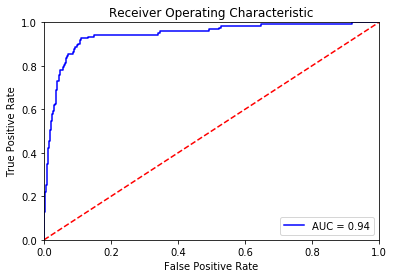

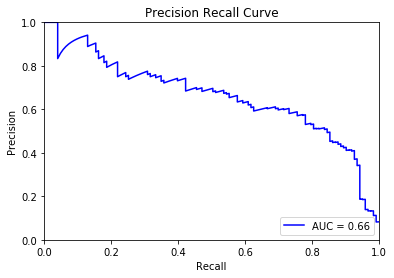

F1_Score: 0.662 --- for a threshold of: 0.241
Confusion matrix:
GT \ Pred            0          1
0                    1417       71
1                    27         96


In [148]:
y_proba_pred = clf.predict_proba(X_test)[:,1]
score(y_proba_pred)

In [ ]:
clf = svm.SVC(probability = True, kernel='rbf')
clf.fit(X_rspl_train, y_rspl_train)

In [ ]:
y_proba_pred = clf.predict_proba(X_test)[:,1]
score(y_proba_pred)

As we can see, the SVM classifier with linear kernel works as well as the neural network.

### f. Random Forest

##### Simple random forest with and without the SMOTE & Resampled train set

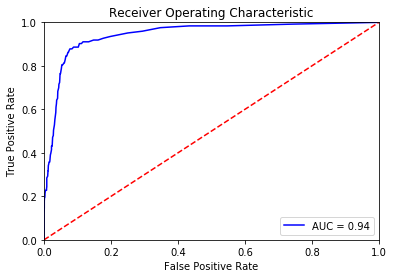

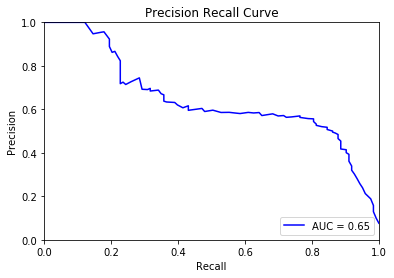

F1_Score: 0.658 --- for a threshold of: 0.321
Confusion matrix:
GT \ Pred            0          1
0                    1409       79
1                    24         99


In [149]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_rspl_train, y_rspl_train)
y_proba_pred = rf.predict_proba(X_test)[:,1]
score(y_proba_pred)

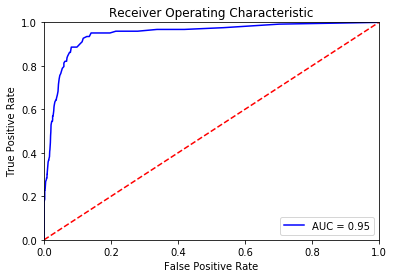

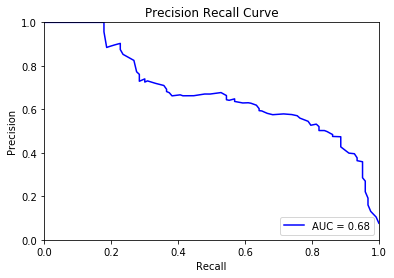

F1_Score: 0.65 --- for a threshold of: 0.341
Confusion matrix:
GT \ Pred            0          1
0                    1418       70
1                    30         93


In [150]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_smote_train, y_smote_train)
y_proba_pred = rf.predict_proba(X_test)[:,1]
score(y_proba_pred)

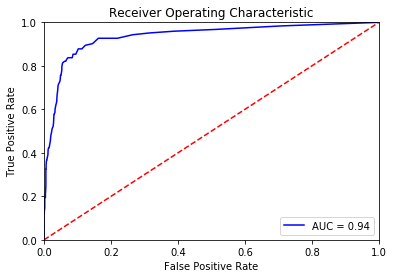

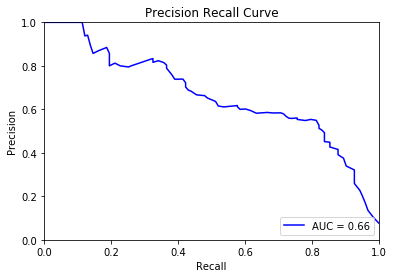

F1_Score: 0.656 --- for a threshold of: 0.211
Confusion matrix:
GT \ Pred            0          1
0                    1406       82
1                    23         100


In [152]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_proba_pred = rf.predict_proba(X_test)[:,1]
score(y_proba_pred)

Although the AUC scores are pretty high, the confusion matrix shows that the accuracy is different for the two classes and that the classifier really often fails to predict the 1. In addition, the rspl dataset seems to give better results than the SMOTE one for the forest, so we will use this one for parameters tuning;
Let's find the optimal parameters for the forest using cross validation. 

##### Parameters tuning

In [153]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [155]:
#Randomnized Search Cross Validation
# create random grid parameters to be explored
RF_classifier = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 8, 11, 14]
min_samples_leaf = [1, 3, 5, 7, 9]
bootstrap = [True, False]

grid_random = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight' : ['balanced']}

# random search of parameters
RF_random = RandomizedSearchCV(estimator = RF_classifier, param_distributions = grid_random, verbose=2, random_state=42, n_jobs = -1)

# fit the randomnized search CV
RF_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [156]:
# Starting Grid Search Cross Validation to find optimal Random Forest Classfifier...
# create the parameter grid based on the results of random search 
# varying slightly the optimised parameters found
if (RF_random.best_params_['max_depth'] == None):
    max_depth = [None]
else: 
    max_depth = [RF_random.best_params_['max_depth']-1, RF_random.best_params_['max_depth'], 
                 RF_random.best_params_['max_depth']+1]

grid_parameters = {
    'bootstrap': [RF_random.best_params_['bootstrap']],
    'max_depth': max_depth, 
    'max_features': [RF_random.best_params_['max_features']],
    'min_samples_leaf': [RF_random.best_params_['min_samples_leaf'],
                         RF_random.best_params_['min_samples_leaf']+1,
                         RF_random.best_params_['min_samples_leaf']+2],
    'min_samples_split': [RF_random.best_params_['min_samples_split'],
                  RF_random.best_params_['min_samples_split']+1],
    'n_estimators': [RF_random.best_params_['n_estimators']-10,
                  RF_random.best_params_['n_estimators'],
                  RF_random.best_params_['n_estimators']+10],
     'class_weight' : ['balanced']
}

# create a new random forest classifier
RF = RandomForestClassifier(class_weight='balanced')
# create grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = grid_parameters, n_jobs = -1, verbose = 2)
# train grid search model
grid_search.fit(X_train, y_train)

# best Random Forest Classifer
final_RF = grid_search.best_estimator_
final_RF.get_params()

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 230,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [157]:
final_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

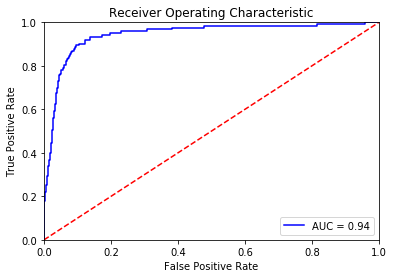

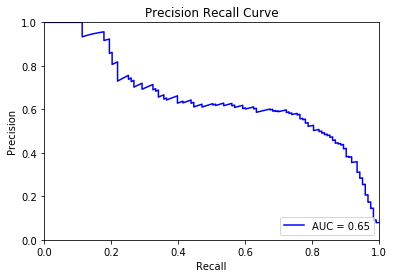

F1_Score: 0.657 --- for a threshold of: 0.528
Confusion matrix:
GT \ Pred            0          1
0                    1419       69
1                    29         94


In [158]:
y_proba_pred = final_RF.predict_proba(X_test)[:,1]
score(y_proba_pred)

### g. Ensembling
Now we will combine some of our models by putting regressions as a parameter of the input dataset.

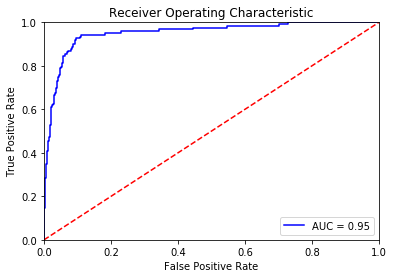

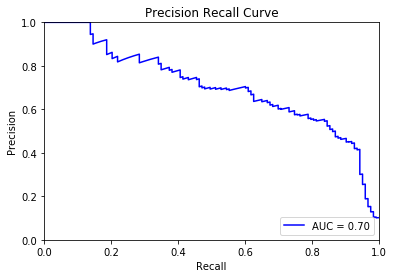

F1_Score: 0.667 --- for a threshold of: 0.409
Confusion matrix:
GT \ Pred            0          1
0                    1405       83
1                    20         103


In [174]:
rf_predict = final_RF.predict_proba(X_test)[:,1]
logreg_predict = logreg1.predict_proba(X_test)[:,1]
svm_predict = clf.predict_proba(X_test)[:,1]
nn_predict = nn_model.predict(X_test)
reg_predict = reg1.predict(X_test)

y_proba_pred = []
for i in range (len(X_test)):
    yi = rf_predict[i] + logreg_predict[i] + svm_predict[i] + nn_predict[i] + reg_predict[i]
    yi = yi /5.0
    y_proba_pred.append(yi)
score(y_proba_pred)

## 3. Conclusion

As a conclusion, it seems that the best model according to the F1 score is the first one we tried, that is to say the simple linear regression with a F1 score of 0.678, a ROC AUC of 0.94 and a PR-AUC of 0.68.

However, several other models such as SVM and RF presents good results. Finally, ensembling all the models improves the AUC of both Precision-Recall and ROC curves.

At the end of the day, the project is a good exemple of imbalanced binary classification as the accuracy is not a good indicator of the model consistency. The best models are not defined per se, but rather depend on what the user wants from the classifers (for instance one that detects a majority of 1 but fails to predict some 0 or one that is better on 0s). 